<a href="https://colab.research.google.com/github/Yash2004Codes/PDS_PROJECT/blob/main/PDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pds project

import pandas as pd

# Load the dataset
data = pd.read_csv("StudentPerformanceFactors.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


# Fill missing values in categorical columns with the mode (most common value)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

# Verify if all missing values have been filled
missing_values_after_fill = data.isnull().sum()
missing_values_after_fill


<ipython-input-4-f2402e6623db>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-4-f2402e6623db>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -1.562146             1.288574   
1      -0.162822   -1.383736             -1.562146            -0.143488   
2       0.671882    1.560853             -0.124267            -0.143488   
3       1.506587    0.781403             -1.562146            -0.143488   
4      -0.162822    1.041220             -0.124267            -0.143488   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                   -1.214685    -0.019796        -0.143800         -1.302866   
1                   -1.214685     0.661399        -1.116110         -1.302866   
2                    0.823259    -0.019796         1.106313          0.134442   
3                    0.823259     0.661399         1.592469          0.134442   
4                    0.823259    -0.700990        -0.699406          0.134442   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_

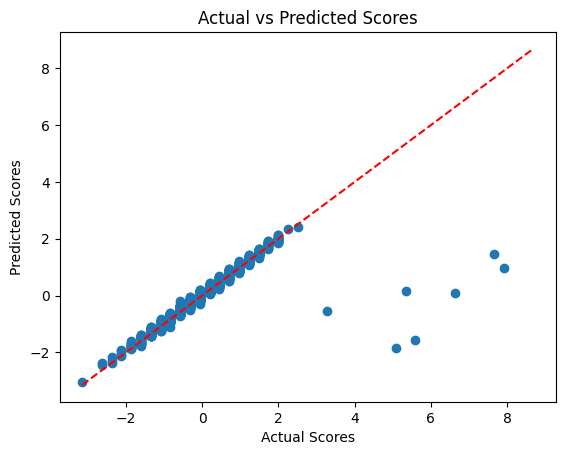

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
df = pd.DataFrame(data)
# Define the mapping
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
education_mapping ={'High School':1,'College':2,'Postgraduate':3}
distance_mapping ={'Near':1,'Moderate':2,'Far':3}
peers_mapping ={'Negative':-1,'Neutral':0,'Positive':1}

# Specify the columns to encode
columns_to_encode = ['Parental_Involvement', 'Access_to_Resources',
'Motivation_Level','Family_Income','Teacher_Quality']
columns_to_encode2 =['Parental_Education_Level']
columns_to_encode3 =['Distance_from_Home']
columns_to_encode4 =['Peer_Influence']


#label or level encoding
# Apply the mapping to each column in columns_to_encode
for col in columns_to_encode:
    df[col] = df[col].map(level_mapping)

# Automatically find columns with only two unique values
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

#binary encoding
#Apply binary encoding (0 and 1) to those columns
for col in binary_columns:
    df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

for col in columns_to_encode2:
    df[col] = df[col].map(education_mapping)

for col in columns_to_encode3:
    df[col] = df[col].map(distance_mapping)

for col in columns_to_encode4:
    df[col] = df[col].map(peers_mapping)



# Assuming 'df' is your fully numerical DataFrame
scaler = StandardScaler()

# Standardize the entire DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.head())

# Define features (X) and target (y)
X = df.drop('Exam_Score', axis=1)  # All columns except 'Target'
y = df['Exam_Score']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

#training model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # line of perfect prediction
plt.show()